In [0]:
## APPLE stock price prediction
## This program is used to predict stock prices of a popular coporation(Apple Inc) in Artificial Recurrent Neural Network is called LSTM (Long Short Term Memory)

In [0]:
##Import the libraries
# Warnings
import warnings
warnings.filterwarnings('ignore')
## math library for mathematical function
import math
## labeled data view in dataframe
import pandas as pd
## data reader od panda is used fetch the data from web
import pandas_datareader as web
## numpy is used to create multi dimensional array
import numpy as np
## tensorflow is uded to create DL model and wrapping the other libraries
import tensorflow as tf
## sklearn is providing ultility functions for standerdizing or scaling data
from sklearn.preprocessing import MinMaxScaler
## keras is a neural network library
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
## it is uded to create plotting area
import matplotlib.pyplot as mtlplt
## feature scaling distribution
from matplotlib import rcParams 


In [81]:
## Get stock historical price data between 2009-01-01 and 2019-04-20 which gathered from yahoo finance page
data_frame = pd.read_csv('AAPL-3.csv')
## Visualize the price
data_frame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,12.268572,13.005714,12.165714,12.964286,11.253528,186503800
1,2009-01-05,13.310000,13.740000,13.244286,13.511429,11.728474,295402100
2,2009-01-06,13.707143,13.881429,13.198571,13.288571,11.535025,322327600
3,2009-01-07,13.115714,13.214286,12.894286,13.001429,11.285772,188262200
4,2009-01-08,12.918571,13.307143,12.862857,13.242857,11.495339,168375200
...,...,...,...,...,...,...,...
2838,2020-04-14,280.000000,288.250000,278.049988,287.049988,287.049988,48748700
2839,2020-04-15,282.399994,286.329987,280.630005,284.429993,284.429993,32788600
2840,2020-04-16,287.380005,288.200012,282.350006,286.690002,286.690002,39281300
2841,2020-04-17,284.690002,286.950012,276.859985,282.799988,282.799988,53812500


In [82]:
## Get the number of rows and columns in the data set
data_frame.shape

(2843, 7)

<function matplotlib.pyplot.show>

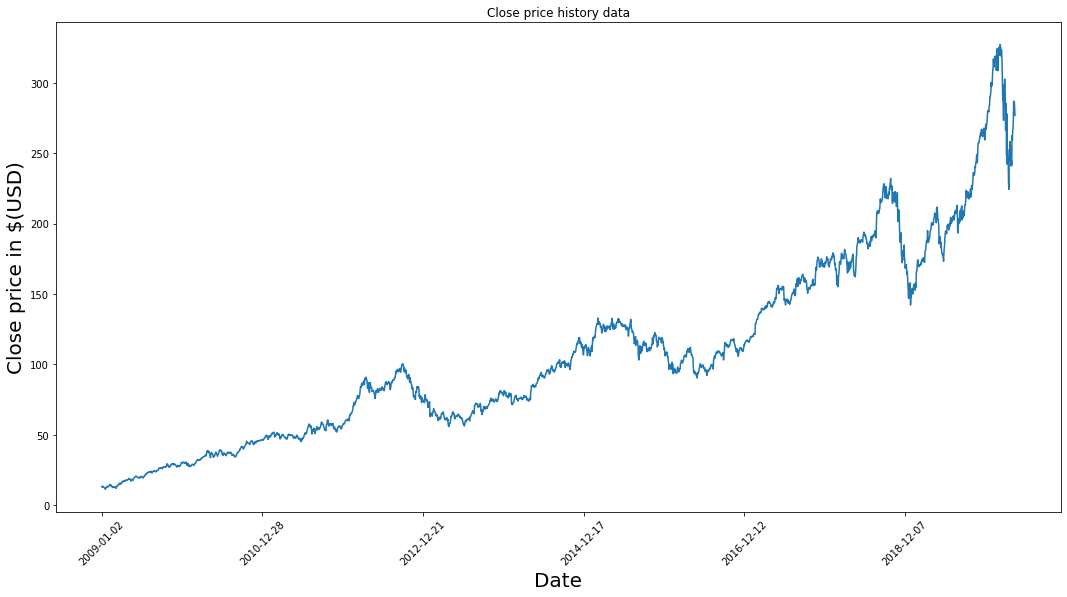

In [83]:
## Visulaizing close price on graph from historical data
mtlplt.figure(figsize=(18,9))
mtlplt.title('Close price history data')
mtlplt.plot(data_frame['Close'])
#plt.plot(range(data_frame.shape[0]),(data_frame['Low']+data_frame['High'])/2.0)
mtlplt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close price in $(USD)',fontsize=20)
mtlplt.show

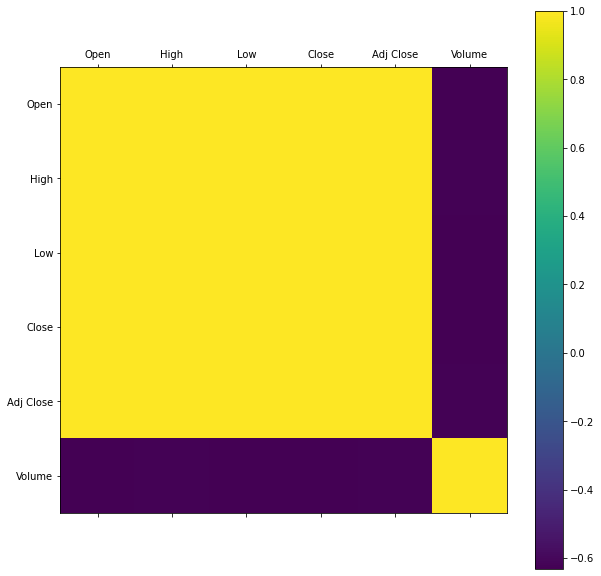

In [84]:
scaling_data_frame = data_frame.filter(['Open','High','Low','Close','Adj Close','Volume'])
## Scaling the features
scaler = MinMaxScaler(feature_range=(0,1))
## Transform the data into
scaled_Data = scaler.fit_transform(scaling_data_frame)
## Display the scaled features into dataframe
scaled_data_frame = pd.DataFrame(data=scaled_Data, index=[data_frame.Date], columns=['Open','High','Low','Close','Adj Close','Volume'] )
## Feature Scaling and visualization of feature distribution
rcParams['figure.figsize'] = 20, 10
mtlplt.matshow(data_frame.corr())
mtlplt.yticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
mtlplt.xticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
mtlplt.colorbar()

In [85]:
## Create a seperate dataframe with only colse column
stock_close_data = data_frame.filter(['Close'])

## Convert created dataframe into numpy array
stock_close_dataset = stock_close_data.values

## Split dataset for training and testing
trainingDataLength = math.ceil( len(stock_close_dataset) * 0.8 )

## Display the training data length
trainingDataLength

2275

In [86]:
## Scaling the data its come under preprocessing stage
## Create feature range into 0,1
scaler = MinMaxScaler(feature_range=(0,1))

## Transform the data into
scaledData = scaler.fit_transform(stock_close_dataset)

## Display scaled data value
scaledData

array([[0.00567308],
       [0.00740439],
       [0.00669921],
       ...,
       [0.87181536],
       [0.8595063 ],
       [0.84093205]])

In [87]:
## Create a new dataset which contain scaled value
StockTrainData = scaledData[0:trainingDataLength , :]

## Spliting the dataset into two parts such as Xtrain and Ytrain datasets
Xtrain = []
Ytrain = []

for i in range(60, len(StockTrainData)):
  Xtrain.append(StockTrainData[i-60:i, 0])
  Ytrain.append(StockTrainData[i, 0])
  if i<= 61:
    print(Xtrain)
    print(Ytrain)
    print()

[array([0.00567308, 0.00740439, 0.00669921, 0.00579062, 0.00655456,
       0.00559624, 0.00472832, 0.00429889, 0.00322303, 0.00234156,
       0.00186692, 0.        , 0.00209294, 0.00459271, 0.00459271,
       0.00517132, 0.00566404, 0.00723262, 0.00669017, 0.00539282,
       0.00601663, 0.00668113, 0.00693879, 0.00825422, 0.00972787,
       0.01098906, 0.00887352, 0.00841696, 0.00952445, 0.00947473,
       0.00738179, 0.00730946, 0.00562336, 0.0058765 , 0.00395534,
       0.00544707, 0.00585842, 0.0049679 , 0.00502215, 0.00440285,
       0.00459723, 0.00586294, 0.00480969, 0.00320948, 0.00221951,
       0.00471476, 0.00654552, 0.0082045 , 0.00801465, 0.00778411,
       0.00970075, 0.01054154, 0.01058674, 0.01057318, 0.01331706,
       0.01279269, 0.01278817, 0.01431606, 0.01295091, 0.0118841 ])]
[0.012168880306627203]

[array([0.00567308, 0.00740439, 0.00669921, 0.00579062, 0.00655456,
       0.00559624, 0.00472832, 0.00429889, 0.00322303, 0.00234156,
       0.00186692, 0.        , 0.0

In [0]:
## Convert Xtrain data, Ytrain data into numpy array
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [89]:
## Reshape the Xtrain data (number of column and number of row)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(2215, 60, 1)

In [0]:
## Develop LSTM model
model = Sequential()

## Assign neurons as 50
neurons = 50

## First LSTM layer
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 

## Second LSTM layer, no more layer for lstm so return_sequence is false
model.add(LSTM(neurons, return_sequences= False)) 

## Adding Dense layer which always have 25 neurons by default
model.add(Dense(25)) 
model.add(Dense(1))

In [0]:
##Compile  model
## mse= mean squared error
model.compile(optimizer='adam', loss='mse') 

In [92]:
## Fiting model with given training dataset
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=200, verbose=2, validation_split=0.2)

Train on 1772 samples, validate on 443 samples
Epoch 1/200
 - 3s - loss: 0.0037 - val_loss: 3.0525e-04
Epoch 2/200
 - 2s - loss: 1.2817e-04 - val_loss: 1.8592e-04
Epoch 3/200
 - 2s - loss: 1.0069e-04 - val_loss: 1.7480e-04
Epoch 4/200
 - 2s - loss: 9.0863e-05 - val_loss: 1.8356e-04
Epoch 5/200
 - 2s - loss: 8.8641e-05 - val_loss: 2.3485e-04
Epoch 6/200
 - 2s - loss: 9.0890e-05 - val_loss: 1.5874e-04
Epoch 7/200
 - 2s - loss: 8.4251e-05 - val_loss: 1.6262e-04
Epoch 8/200
 - 2s - loss: 8.7776e-05 - val_loss: 3.4111e-04
Epoch 9/200
 - 2s - loss: 8.7907e-05 - val_loss: 1.4899e-04
Epoch 10/200
 - 2s - loss: 7.6955e-05 - val_loss: 1.6032e-04
Epoch 11/200
 - 2s - loss: 7.7069e-05 - val_loss: 2.4818e-04
Epoch 12/200
 - 2s - loss: 7.2773e-05 - val_loss: 1.4404e-04
Epoch 13/200
 - 2s - loss: 7.5197e-05 - val_loss: 1.4490e-04
Epoch 14/200
 - 2s - loss: 7.0703e-05 - val_loss: 1.3960e-04
Epoch 15/200
 - 2s - loss: 7.7779e-05 - val_loss: 3.2932e-04
Epoch 16/200
 - 2s - loss: 7.6440e-05 - val_loss: 1

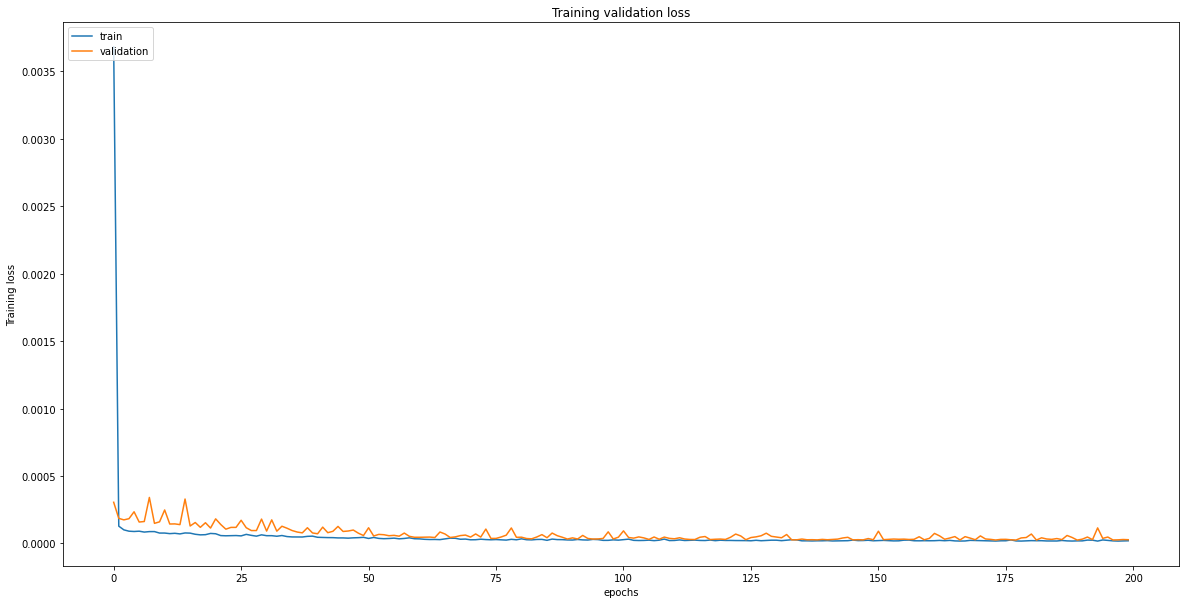

In [93]:
## Visualize train and validation loss
mtlplt.figure(figsize=(20,10))
mtlplt.title('Training validation loss')
mtlplt.plot(history_data.history['loss'])
mtlplt.plot(history_data.history['val_loss'])
mtlplt.ylabel('Training loss')
mtlplt.xlabel('epochs')
mtlplt.legend(['train' , 'validation'], loc = 'upper left')
mtlplt.show()

In [0]:
##Create testing dataset, new array which contains scaled value from 2275 out of 2843
testingData = scaledData[trainingDataLength - 60: , :]

## Create dataset Xtest and Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
  Xtest.append(testingData[i-60:i, 0])
  

In [95]:
## Convert data into numpy array
Xtest = np.array(Xtest)
Xtest

array([[0.45821351, 0.45906788, 0.45881473, ..., 0.51928395, 0.52501127,
        0.52216344],
       [0.45906788, 0.45881473, 0.46175753, ..., 0.52501127, 0.52216344,
        0.53137148],
       [0.45881473, 0.46175753, 0.45957417, ..., 0.52216344, 0.53137148,
        0.53187773],
       ...,
       [0.96636379, 0.96993943, 0.97478076, ..., 0.82928756, 0.87295445,
        0.86466408],
       [0.96993943, 0.97478076, 0.97186959, ..., 0.87295445, 0.86466408,
        0.87181536],
       [0.97478076, 0.97186959, 0.94225206, ..., 0.86466408, 0.87181536,
        0.8595063 ]])

In [0]:
## Reshape data from 2 Dimensional to 3 Dimensional
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))

In [97]:
## Get predicted stock price value
## Unscaling the predicted value
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

array([[175.69693],
       [179.07144],
       [178.7457 ],
       [177.93338],
       [176.54617],
       [176.88762],
       [173.79723],
       [170.92049],
       [171.85353],
       [167.79689],
       [167.27625],
       [167.81152],
       [167.99953],
       [159.9293 ],
       [156.7183 ],
       [164.27982],
       [159.36967],
       [155.09013],
       [157.01698],
       [163.51222],
       [164.29787],
       [167.29341],
       [172.89784],
       [171.55023],
       [171.18932],
       [170.6033 ],
       [172.41377],
       [175.5181 ],
       [178.8563 ],
       [177.7531 ],
       [177.70956],
       [174.4593 ],
       [176.41374],
       [176.84178],
       [176.58224],
       [174.82152],
       [177.18355],
       [180.08304],
       [181.41408],
       [179.23653],
       [177.96082],
       [178.47945],
       [177.73509],
       [174.87817],
       [175.29448],
       [170.8798 ],
       [168.91408],
       [164.9406 ],
       [174.00098],
       [167.68004],


In [98]:
## Get RSME(Root Mean Squared Error) it nearl to 5, then it will be best model
rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

6.82925518909042

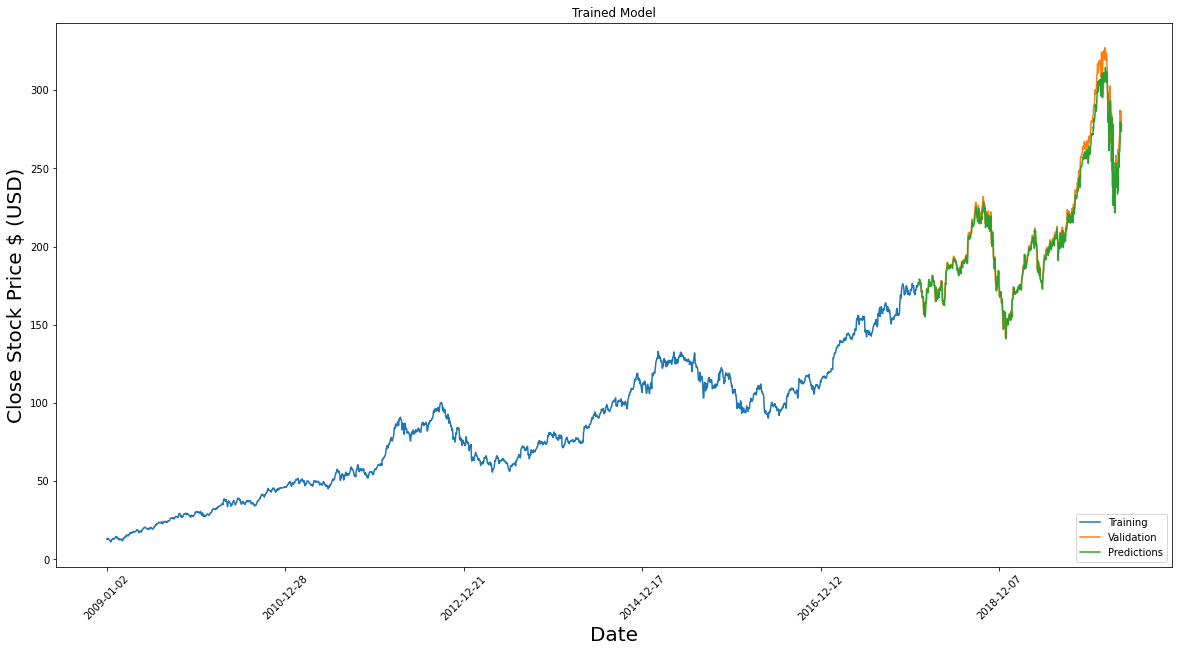

In [99]:
## Ploting data to graph train and validation
training = stock_close_data[:trainingDataLength]
validation = stock_close_data[trainingDataLength:]
validation['Predictions'] = predictions

## Visualize trainning, validating and predicting values in graph
mtlplt.figure(figsize=(20,10))
mtlplt.title('Trained Model')
mtlplt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close Stock Price $ (USD)', fontsize=20)
mtlplt.plot(training['Close'])
mtlplt.plot(validation[['Close', 'Predictions']])
mtlplt.legend(['Training', 'Validation', 'Predictions'], loc='lower right')
mtlplt.show()

In [100]:
## Show  validate and predicted stock prices
validation

,Close,Predictions
2275,179.100006,175.696930
2276,179.259995,179.071442
2277,178.460007,178.745697
2278,177.000000,177.933380
2279,177.039993,176.546173
...,...,...
2838,287.049988,266.400482
2839,284.429993,279.610046
2840,286.690002,273.949158
2841,282.799988,278.634064


In [101]:
## Get quote of apple
appleQuote = web.DataReader('AAPL', data_source='yahoo', start='2009-01-01', end='2019-04-20')

## Creating a new dataframe
new_data_frame = appleQuote.filter(['Close'])

## Get the last sixty day closing stock price values and converting the dataframe into an array
last60Days = new_data_frame[-60:].values

##Scale the data to be values between 0 and 1
last60Days_scaled = scaler.transform(last60Days)

##Creating an empty test list
X_test_data = []

##Append the past 60 days
X_test_data.append(last60Days_scaled)

##Converting the X_test_data into a numpy array
X_test_data = np.array(X_test_data)

## Reshape data from 2 Dimensionsal to 3 Dimensional
X_test_data = np.reshape(X_test_data, (X_test_data.shape[0], X_test_data.shape[1], 1))

## Get predicted scaled stock price
predicted_price = model.predict(X_test_data)

## Unscaling the predicted value
predicted_price = scaler.inverse_transform(predicted_price)

## Display the pridicted price for next day
print(predicted_price)

[[284.4164]]


In [102]:
## Get apple quote
appleQuote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-04-20', end='2020-04-20')
print(appleQuote2['Close'])

Date
2020-04-20    276.929993
2020-04-20    276.929993
Name: Close, dtype: float64
